# **STOCK MARKET ANALYSIS FOR SOME FINTECH COMPANIES**

In this analysis, I will discover and explore time series data from Nasdaq Stock Market, particularly some FinTech companies: Paypal Holdings, Inc. (PYPL), Coinbase Global, Inc. (COIN), SoFi Technologies, Inc. (SOFI), Upstart Holdings, Inc. (UPST). I will visualize different perspective, analyze the risk and predict the future price based on the historical data.

**Questions to be answered:**
1) What was the change of stocks' price over time?
2) What was the average daily return of stocks?
3) What was the moving average of stocks?
4) What was the correlation between different stocks?
5) How much value are investors risking when investing in a particular stock?
6) How to predict the future closing price of stocks?

## Prepare the Data

### Import packages

In [99]:
%%capture
%pip install pandas_datareader --no-cache-dir

%pip install yfinance --upgrade --no-cache-dir

%pip install seaborn --upgrade 

%pip install tensorflow --no-cache-dir

In [2]:
#For data manipulation
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For time stamps
from datetime import datetime

#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

#For predicting future stock data
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

### Loading Data

In [58]:
#Override yahoo finance
yf.pdr_override()

#List of stocks using for the analysis
stock_list = ['PYPL', 'COIN', 'SOFI', 'UPST','AFRM']

#Set up time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#Load the Data
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

#Create DataFrame
company_list = [PYPL, COIN, SOFI, UPST, AFRM]
company_name = ['PAYPAL', 'COINBASE', 'SOFI', 'UPSTART', 'AFFIRM']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

# Reorder columns
df.rename(columns={"company_name": "Company"}, inplace=True)
order = ['Company', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = df.reindex(columns=order)

df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Company,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-05-23,PAYPAL,63.029999,63.299999,61.840000,62.000000,62.000000,16815500
2023-05-24,PAYPAL,61.650002,62.215000,61.230000,61.799999,61.799999,14790300
2023-05-25,PAYPAL,61.740002,61.740002,59.314999,59.369999,59.369999,24461300
2023-05-26,PAYPAL,59.500000,60.606998,58.950001,60.220001,60.220001,20632500
2023-05-30,PAYPAL,61.040001,62.189999,59.549999,62.049999,62.049999,21356700


## Data exploration 

### Basic information about Data

In [4]:
#Information about Stock Data List
print('Stock list information')
df.info()

Stock list information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1265 entries, 2023-05-23 to 2024-05-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    1265 non-null   object 
 1   Open       1265 non-null   float64
 2   High       1265 non-null   float64
 3   Low        1265 non-null   float64
 4   Close      1265 non-null   float64
 5   Adj Close  1265 non-null   float64
 6   Volume     1265 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [5]:
#Information about PAYPAL
print('PYPL information')
PYPL.info()

PYPL information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-23 to 2024-05-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
#Information about COINBASE
print('COIN information')
COIN.info()

COIN information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-23 to 2024-05-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
#Information about SOFI
print('SOFI information')
SOFI.info()

SOFI information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-23 to 2024-05-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
#Information about UPSTART
print('UPST information')
UPST.info()

UPST information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-23 to 2024-05-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
#Information about AFFIRM
print('AFRM information')
AFRM.info()

AFRM information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-23 to 2024-05-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


=> The data has been cleaned and there are no missing values (non-null) in any of the columns. The data types of the columns are mostly float64 (floating-point data) and int64 (integer data), with only the company_name column being of object type (string data).

### Descriptive statistics about the Data

In [10]:
#Descriptive statistics about Stock Data List
print('Descriptive statistics about Stock Data List')
df.describe()

Descriptive statistics about Stock Data List


,Open,High,Low,Close,Adj Close,Volume
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1.265000e+03
mean,52.507246,54.127527,51.031772,52.568953,52.568953,1.931841e+07
std,52.879500,54.683707,51.085187,52.870384,52.870384,2.084545e+07
min,5.200000,5.330000,5.090000,5.210000,5.210000,2.224900e+06
25%,17.620001,18.320000,16.910000,17.610001,17.610001,8.310000e+06
50%,35.570000,37.439999,34.380001,35.570000,35.570000,1.273910e+07
75%,63.849998,64.900002,63.025002,63.950001,63.950001,2.267870e+07
max,280.119995,283.480011,266.690002,279.709991,279.709991,2.863809e+08


In [11]:
#Descriptive statistics about PAYPAL
print('Descriptive statistics about PYPL')
PYPL.describe()

Descriptive statistics about PYPL


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,62.119668,62.963269,61.304190,62.130869,62.130869,1.586248e+07
std,4.769040,4.786783,4.709997,4.742632,4.742632,7.459745e+06
min,50.950001,51.445000,50.250000,50.389999,50.389999,6.429000e+06
25%,58.750000,59.639999,58.005001,58.869999,58.869999,1.138760e+07
50%,62.169998,62.834999,61.452000,62.049999,62.049999,1.405000e+07
75%,64.540001,65.470001,63.770000,64.540001,64.540001,1.805670e+07
max,76.190002,76.540001,74.739998,75.820000,75.820000,6.827270e+07


**=> Summary:** 
- Count: There are 253 data points available for analysis in the PYPL stock data.
- Mean: The average values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns are all around 62.
- Standard Deviation: The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have relatively low standard deviations, indicating less variability in the data compared to the stock data list.
- Minimum and Maximum: The minimum and maximum values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns suggest a narrower range of prices observed during the given period compared to the stock data list.st.

In [12]:
#Descriptive statistics about COINBASE
print('Descriptive statistics about COIN')
COIN.describe()

Descriptive statistics about COIN


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,132.569091,137.205297,128.227115,132.735810,132.735810,1.228103e+07
std,65.167340,67.471118,62.648797,64.962978,64.962978,7.322205e+06
min,47.099998,52.380001,46.430000,50.560001,50.560001,4.043800e+06
25%,77.760002,80.059998,75.599998,77.989998,77.989998,7.788100e+06
50%,107.309998,111.879997,103.500000,109.250000,109.250000,1.029720e+07
75%,186.059998,193.639999,177.750000,186.360001,186.360001,1.436500e+07
max,280.119995,283.480011,266.690002,279.709991,279.709991,6.542440e+07


**=> Summary:** 
- Count: There are 253 data points available for analysis in the COIN stock data.
- Mean: The average values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns are around 132.
- Standard Deviation: The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have high standard deviations, indicating high variability in the data.
- Minimum and Maximum: The minimum and maximum values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns suggest a wide range of prices observed during the given period.

In [13]:
#Descriptive statistics about SOFI
print('Descriptive statistics about SOFI')
SOFI.describe()

Descriptive statistics about SOFI


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,8.030506,8.238846,7.838929,8.032866,8.032866,4.615710e+07
std,0.956448,0.992234,0.923013,0.957000,0.957000,3.161822e+07
min,5.200000,5.330000,5.090000,5.210000,5.210000,1.345760e+07
25%,7.330000,7.530000,7.170000,7.340000,7.340000,2.773550e+07
50%,7.950000,8.200000,7.770000,7.960000,7.960000,3.873610e+07
75%,8.590000,8.810000,8.360000,8.600000,8.600000,5.005150e+07
max,11.060000,11.700000,10.310000,11.450000,11.450000,2.863809e+08


**=> Summary:** 
- Count: There are 253 data points available for analysis in the SOFI stock data.
- Mean: The average values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns are around 8.
- Standard Deviation: The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have relatively low standard deviations, indicating less variability in the data compared to the stock data list.
- Minimum and Maximum: The minimum and maximum values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns suggest a narrow range of prices observed during the given period.

In [14]:
#Descriptive statistics about UPSTART
print('Descriptive statistics about UPST')
UPST.describe()

Descriptive statistics about UPST


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,31.753566,33.160747,30.586739,31.838459,31.838459,8.141136e+06
std,9.608240,10.222701,8.981092,9.653090,9.653090,4.930014e+06
min,20.570000,21.320000,19.840000,20.870001,20.870001,2.224900e+06
25%,25.500000,26.450001,24.780001,25.559999,25.559999,4.519700e+06
50%,29.209999,30.400000,28.139999,29.170000,29.170000,6.943600e+06
75%,33.889999,35.700001,32.779999,33.900002,33.900002,1.000760e+07
max,69.074997,72.580002,65.540001,72.089996,72.089996,3.456210e+07


**=> Summary:** 
- Count: There are 253 data points available for analysis in the UPST stock data.
- Mean: The average values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns are around 31.
- Standard Deviation: The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have moderate standard deviations, indicating some variability in the data.
- Minimum and Maximum: The minimum and maximum values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns suggest a wide range of prices observed during the given period.

In [15]:
#Descriptive statistics about AFFIRM
print('Descriptive statistics about AFRM')
AFRM.describe()

Descriptive statistics about AFRM


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,28.063399,29.069474,27.201885,28.106759,28.106759,1.415030e+07
std,10.789132,11.166529,10.479899,10.788457,10.788457,1.044766e+07
min,13.460000,14.135000,12.810000,13.650000,13.650000,3.135400e+06
25%,17.620001,18.320000,16.910000,17.610001,17.610001,7.683900e+06
50%,25.459999,26.549999,25.020000,25.570000,25.570000,1.144620e+07
75%,37.410000,38.490002,36.470001,37.500000,37.500000,1.584020e+07
max,51.150002,52.480000,49.880001,51.389999,51.389999,8.573590e+07


**=> Summary:** 
- Count: There are 253 data points available for analysis in the AFRM stock data.
- Mean: The average values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns are around 28.
- Standard Deviation: The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have moderate standard deviations, indicating some variability in the data.
- Minimum and Maximum: The minimum and maximum values for the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns suggest a wide range of prices observed during the given period.

### Data cleaning

In [16]:
#Check for missing values
df.isna().sum()

Company      0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
#Check duplicates
df.duplicated().sum()

0

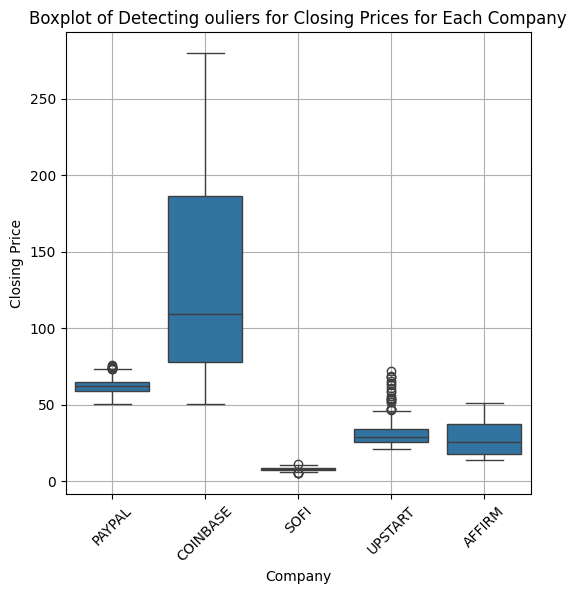

In [100]:
#Detect outliers for Closing price of each company
# Set figure 
plt.figure(figsize=(6,6))

# Create boxplot
sns.boxplot(x='Company', y='Close', data=df)
plt.title('Boxplot of Detecting ouliers for Closing Prices for Each Company')
plt.xlabel('Company')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

=> There is no missing value and each row in the dataset represents a unique observation.

However, outliers exist in the data. These outliers may represent extreme fluctuations or anomalies in the closing prices for those companies.


## Overview of the stocks

### Closing price

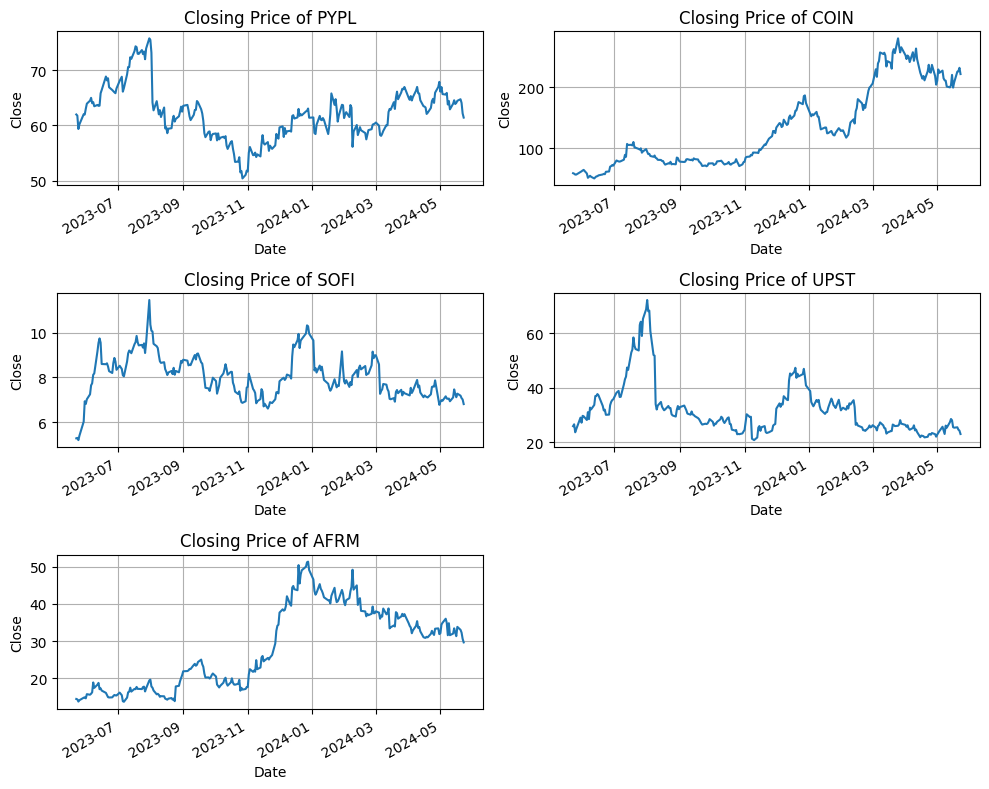

In [19]:
# Set figure and axes
plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plotting each company's closing price
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot(grid=True)
    plt.ylabel('Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

#### **Evaluation by Closing price**

- **PYPL (PayPal):** The stock shows a generally upward trend with some fluctuations. It has been a steady performer, consistently growing throughout the period. However, there was a dip in late 2023, indicating potential market volatility.
- **COIN (Coinbase):** The stock demonstrates a strong upward trend with a significant increase in price. It is considered a clear winner, showcasing impressive growth and resilience. The performance of COIN suggests a positive outlook for the cryptocurrency industry.
- **SOFI (SoFi Technologies):** The stock exhibits fluctuating trends, with periods of both growth and decline. It is considered a volatile stock, showing potential but also carrying risk. Investors should exercise caution due to the stock's up-and-down movement.
- **UPST (Upstart Holdings):** The stock fluctuates but it experienced a sharp spike in early 2024. UPST is considered a high-risk, high-reward stock, showing potential for significant gains but also vulnerability to market swings. Investors should be aware of the stock's volatility.
- **AFRM (Affirm Holdings):** This stock demonstrates a generally upward trend with some consolidation periods. It is a steady performer, indicating potential for continued growth. The consistent climb of AFRM suggests a positive outlook for the buy now, pay later sector.

**=> Overall:** 
- **Strong Performers:** COIN and PYPL show promising growth potential.
- **Volatile Investments:** SOFI and UPST offer potential for gains but carry significant risk.
- **Steady Growth:** AFRM demonstrates consistent growth, making it a potentially solid investment.

### Trading volume

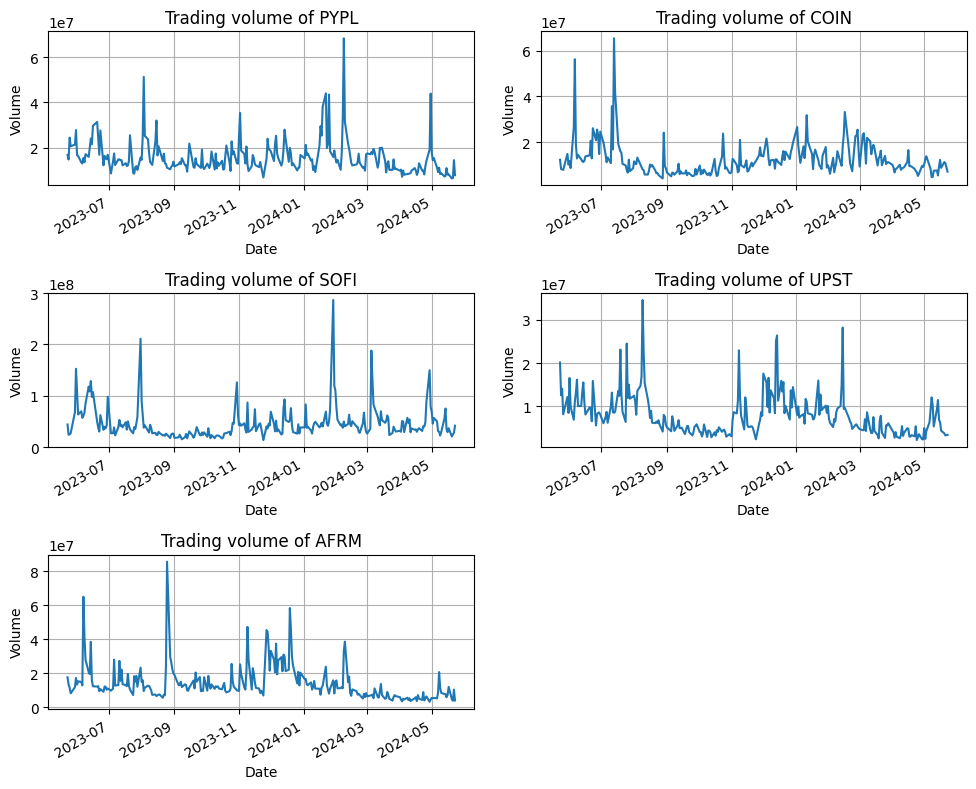

In [20]:
# Set figure and axes
plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plotting each company's closing price
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot(grid=True)
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Trading volume of {stock_list[i - 1]}")
    
plt.tight_layout()

#### **Evaluation by Trading volume**

- **PYPL (PayPal):** The stock exhibits a relatively stable trend with occasional spikes in trading volume. Overall, there is consistent interest in the stock but not a significant amount of volatility. The spikes in volume might correspond to news events or earnings releases, indicating increased investor activity during those periods.
- **COIN (Coinbase):** The trading volume for COIN fluctuates with periods of higher and lower volume. This suggests investor interest in the cryptocurrency market but not consistently high trading activity. The fluctuations in volume might be tied to market sentiment towards cryptocurrencies as a whole.
- **SOFI (SoFi Technologies):** SOFI's trading volume is highly volatile, characterized by significant spikes and dips. This indicates a high level of investor interest and the potential for rapid price movements. The large volume spikes suggest a stock that can experience sudden price swings, reflecting the high volatility of the stock.
- **UPST (Upstart Holdings):** The trading volume for UPST fluctuates with periods of high and low volume. This suggests investor interest in the stock, but not consistently high levels of trading activity. The fluctuations in volume might reflect the stock's volatile price movements, indicating potential market uncertainty or speculation.
- **AFRM (Affirm Holdings):** AFRM's trading volume shows a generally decreasing trend with some periods of higher volume. This indicates a decline in investor interest over time, which could be a sign of the market cooling off for this particular stock. The decreasing volume suggests potential for lower price volatility as interest wanes.
 
**=> Overall:** 
- **High Interest:** SOFI stands out with its high trading volume, indicating significant investor attention and potential for volatile price movements.
- **Stable Interest** PYPL demonstrates consistent trading activity, suggesting a stable market for the stock.
- **Fluctuating Interest:** COIN and UPST show fluctuating volume, indicating investor interest but not consistently high trading activity.
- **Decreasing Interest**: AFRM's decreasing volume suggests a potential cooling of the market for this stock.

## Moving average of the stocks

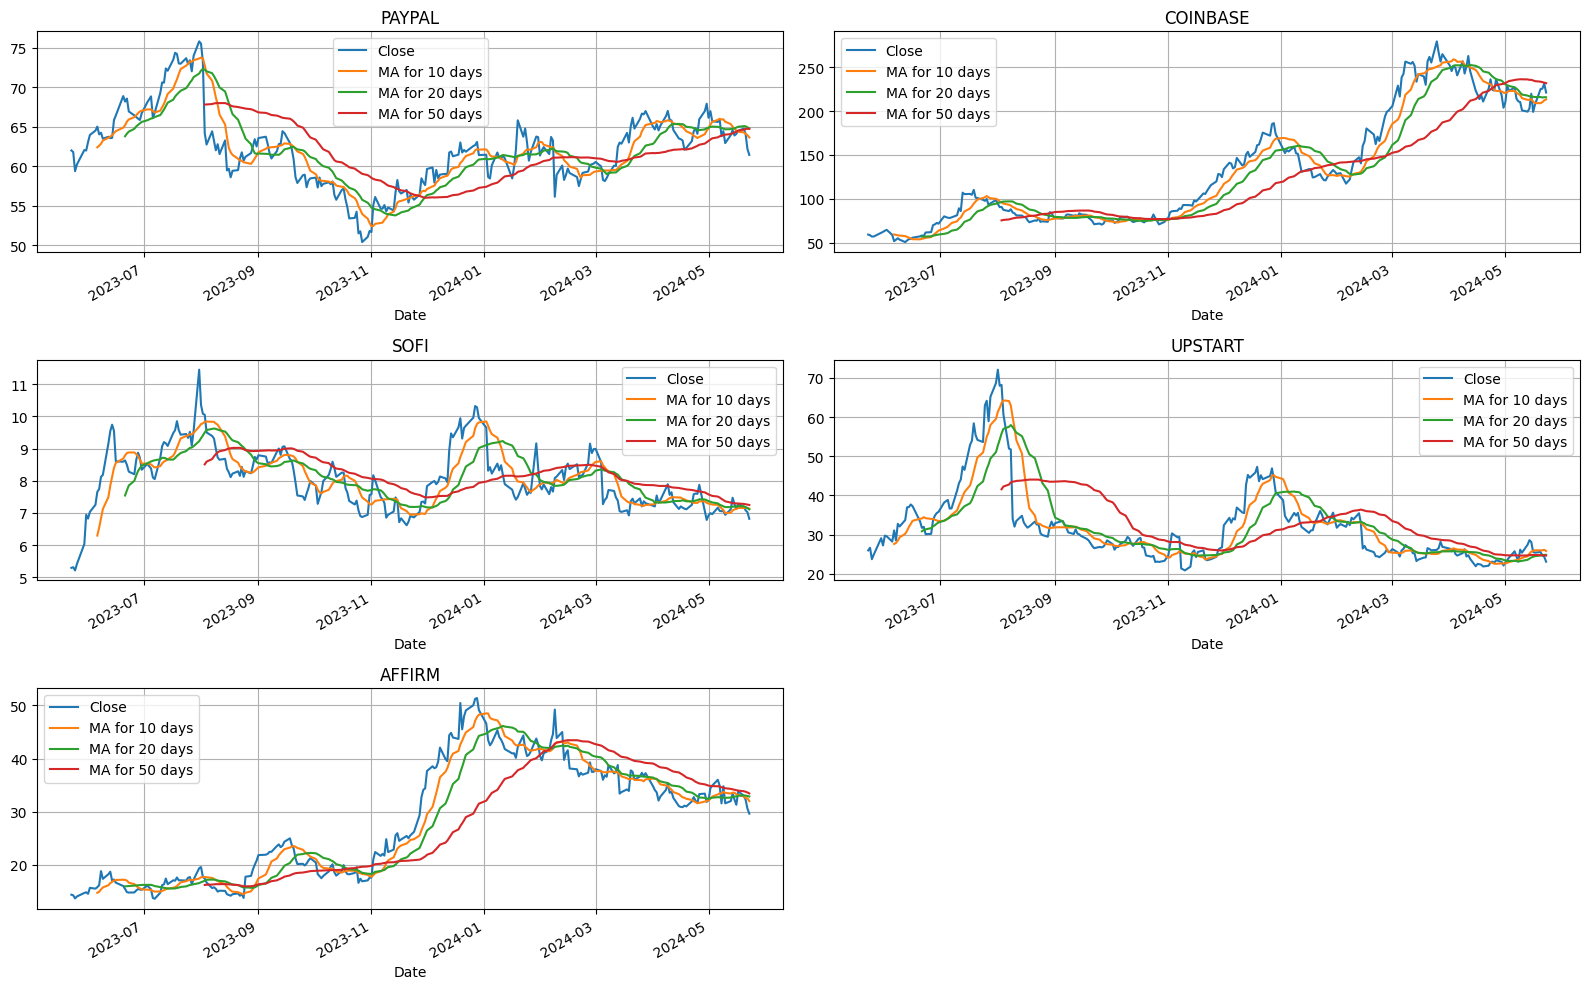

In [21]:
# Calculating average of each stock's closing price
ma_day = [10, 20, 50]

for company in company_list:
    for ma in ma_day:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Close'].rolling(ma).mean()

# Set figure and axes
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plotting each company's moving averages
for i, (company, label) in enumerate(zip(company_list, company_name)):
    if i < len(axes.flat):
        company[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i//2, i%2], title=label, grid=True)

for i in range(len(company_list), len(axes.flat)): # Hide empty subplots
    axes.flatten()[i].axis('off')
    
fig.tight_layout()
plt.show()

#### **Evaluation by Moving average**

- **PYPL (PayPal):** The stock's short-term trend is volatile, closely following the price action indicated by the 10-day moving average (MA). The 20-day MA shows a slight upward trend, while the 50-day MA remains relatively flat, suggesting longer-term consolidation. The stock's price is currently above the 20-day and 50-day MAs, indicating potential for further upside. However, the recent dip below the 10-day MA suggests some short-term weakness. The divergence between the shorter and longer-term MAs indicates a potential for a pullback in the short term.
- **COIN (Coinbase):** All three MAs are trending upward, indicating a strong bullish momentum. The 10-day MA is leading the charge, followed by the 20-day MA, while the 50-day MA is slightly lagging. The stock's price is comfortably above all three MAs, suggesting a strong bullish trend. The upward convergence of the MAs reinforces this positive outlook. The stock's strong performance aligns with the overall bullish sentiment in the cryptocurrency market.
- **SOFI (SoFi Technologies):** The 10-day MA shows a sharp decline, indicating volatility in the stock's short-term trend. The 20-day MA is also declining, while the 50-day MA remains relatively flat, suggesting longer-term consolidation. The stock's price is currently below all three MAs, indicating a bearish trend. The downward trend of the shorter-term MAs indicates a potential for further downside. The stock's recent decline aligns with the overall market volatility and potential concerns about the company's growth prospects.
- **UPST (Upstart Holdings):** The stock's short-term trend is volatile, with a sharp spike followed by a decline indicated by the 10-day MA. The 20-day MA is also declining, while the 50-day MA remains relatively flat. The stock's price is currently below all three MAs, suggesting a bearish trend. The downward trend of the shorter-term MAs indicates a potential for further downside. The stock's recent decline aligns with the overall market volatility and potential concerns about the company's growth prospects.
- **AFRM (Affirm Holdings):** The 10-day MA shows a slight upward trend, indicating volatility in the stock's short-term trend. The 20-day MA is also trending upward, while the 50-day MA remains relatively flat. The stock's price is currently above all three MAs, suggesting a bullish trend. The upward trend of the shorter-term MAs indicates potential for further upside. The stock's recent performance aligns with the overall bullish sentiment in the buy now, pay later sector.
 
**=> Overall:** 
- **Bullish Signals:** COIN shows a strong bullish trend with all three MAs trending upward.
- **Potential for Upside:** PYPL and AFRM are showing signs of potential for further upside, with their prices above their 20-day and 50-day MAs.
- **Bearish Trends:** SOFI and UPST are currently in bearish trends, with their prices below all three MAs, indicating potential for further downside.

## Average daily return

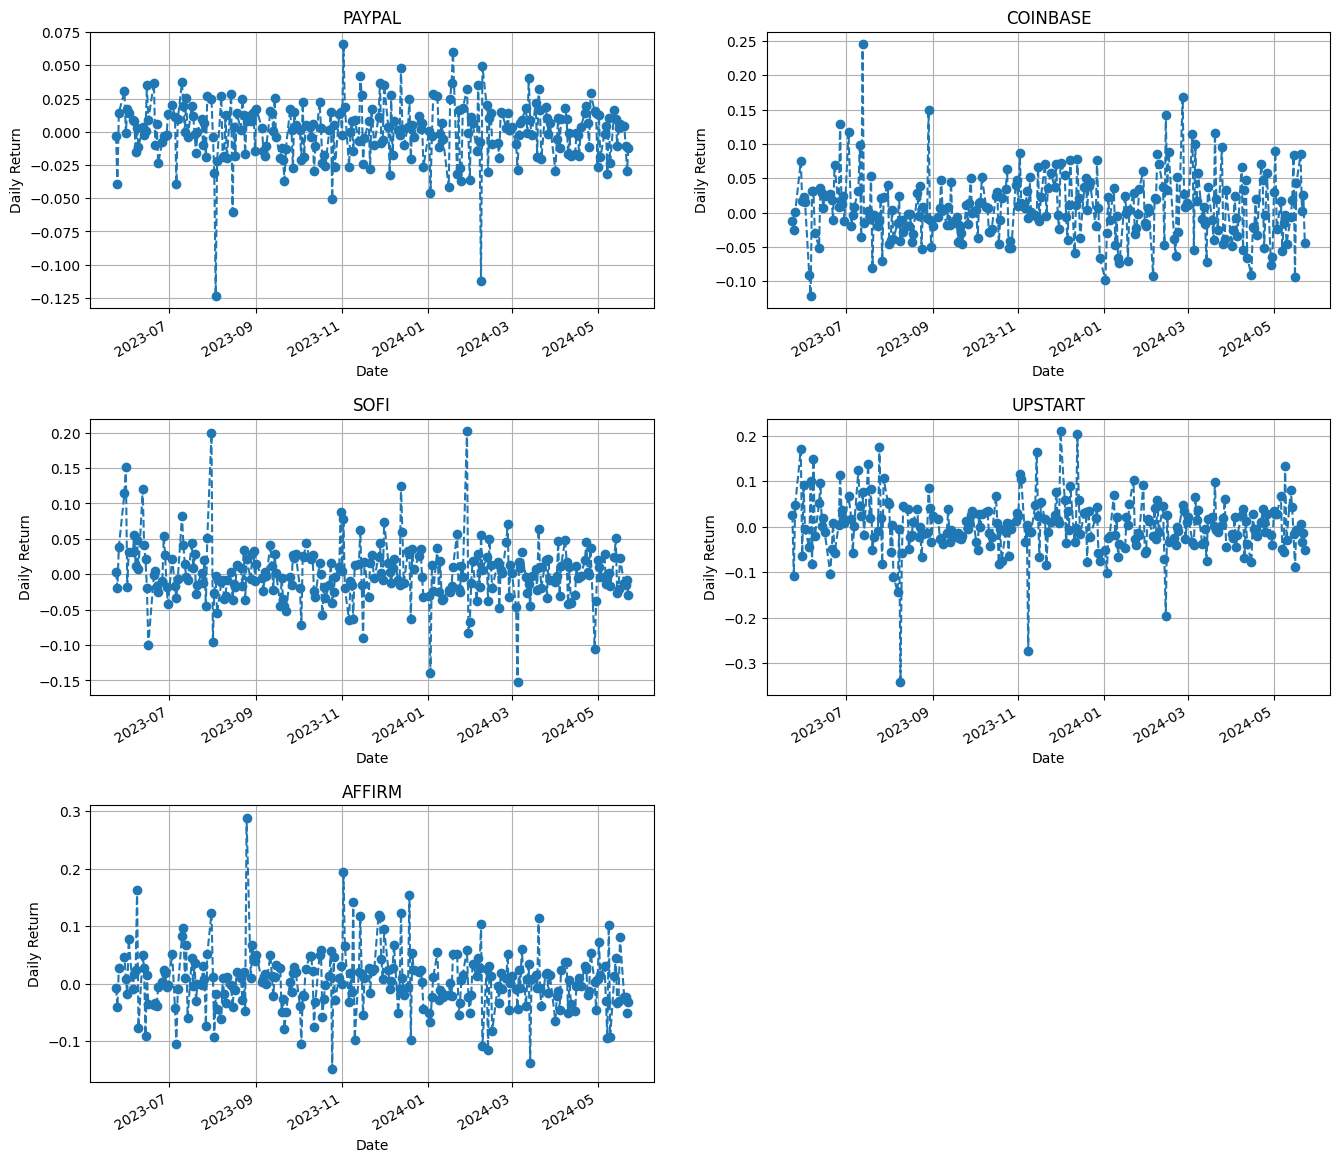

In [22]:
# Calculating average daily return for each stocks
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Set figure and axes
plt.figure(figsize=(16, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=0.4)

# Plotting each company's daily return
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].plot(grid=True, linestyle='--', marker='o')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
     
fig.tight_layout()
plt.show()

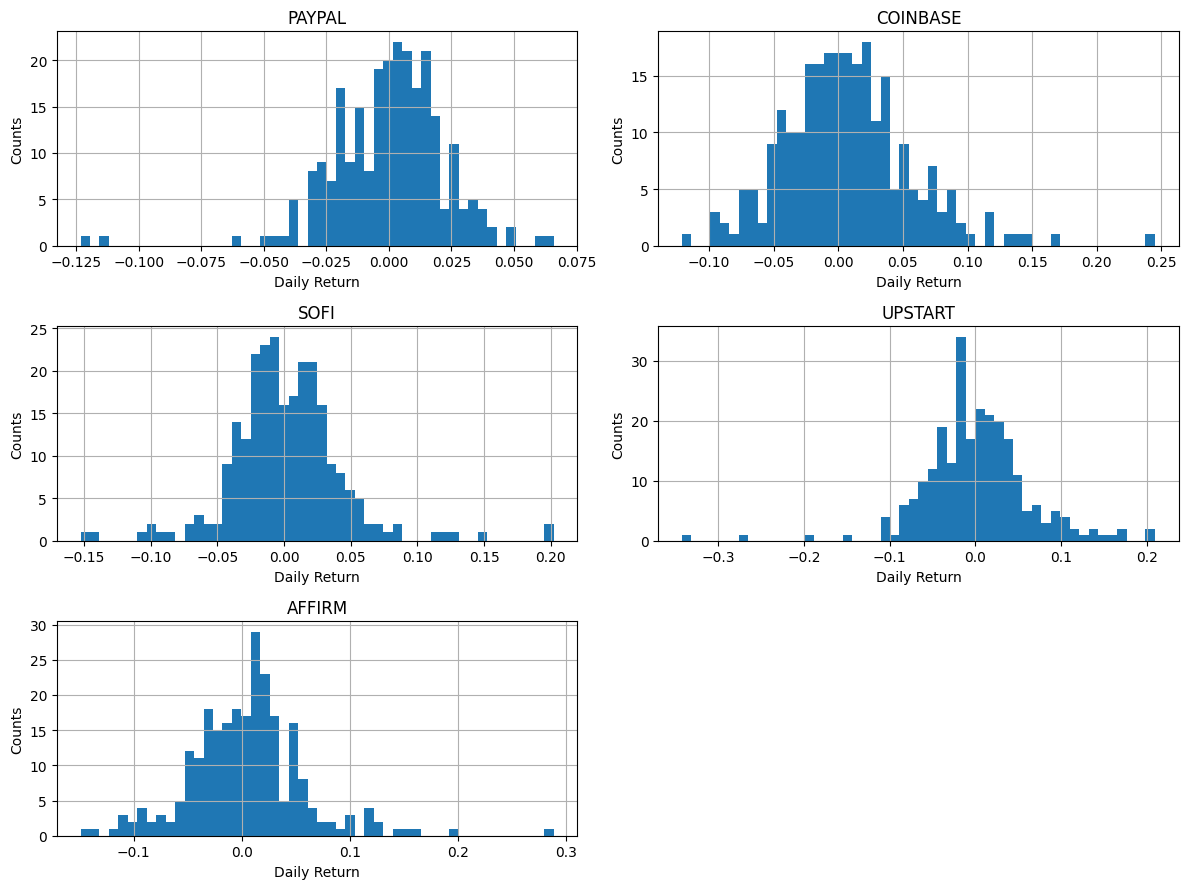

In [23]:
# Create histogram for stocks' daily return
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#### **Evaluation by Moving average**
- **PYPL (PayPal):** The stock's short-term trend is volatile, closely following the price action indicated by the 10-day moving average (MA). The 20-day MA shows a slight upward trend, while the 50-day MA remains relatively flat, suggesting longer-term consolidation. The stock's price is currently above the 20-day and 50-day MAs, indicating potential for further upside. However, the recent dip below the 10-day MA suggests some short-term weakness. The divergence between the shorter and longer-term MAs indicates a potential for a pullback in the short term.
- **COIN (Coinbase):** All three MAs are trending upward, indicating a strong bullish momentum. The 10-day MA is leading the charge, followed by the 20-day MA, while the 50-day MA is slightly lagging. The stock's price is comfortably above all three MAs, suggesting a strong bullish trend. The upward convergence of the MAs reinforces this positive outlook. The stock's strong performance aligns with the overall bullish sentiment in the cryptocurrency market.
- **SOFI (SoFi Technologies):** The 10-day MA shows a sharp decline, indicating volatility in the stock's short-term trend. The 20-day MA is also declining, while the 50-day MA remains relatively flat, suggesting longer-term consolidation. The stock's price is currently below all three MAs, indicating a bearish trend. The downward trend of the shorter-term MAs indicates a potential for further downside. The stock's recent decline aligns with the overall market volatility and potential concerns about the company's growth prospects.
- **UPST (Upstart Holdings):** The stock's short-term trend is volatile, with a sharp spike followed by a decline indicated by the 10-day MA. The 20-day MA is also declining, while the 50-day MA remains relatively flat. The stock's price is currently below all three MAs, suggesting a bearish trend. The downward trend of the shorter-term MAs indicates a potential for further downside. The stock's recent decline aligns with the overall market volatility and potential concerns about the company's growth prospects.
- **AFRM (Affirm Holdings):** The 10-day MA shows a slight upward trend, indicating volatility in the stock's short-term trend. The 20-day MA is also trending upward, while the 50-day MA remains relatively flat. The stock's price is currently above all three MAs, suggesting a bullish trend. The upward trend of the shorter-term MAs indicates potential for further upside. The stock's recent performance aligns with the overall bullish sentiment in the buy now, pay later sector.

**=> Overall:**

- **Bullish Signals:** COIN shows a strong bullish trend with all three MAs trending upward.
- **Potential for Upside:** PYPL and AFRM are showing signs of potential for further upside, with their prices above their 20-day and 50-day MAs.
- **Bearish Trends:** SOFI and UPST are currently in bearish trends, with their prices below all three MAs, indicating potential for further downside.

## Correlation between different stocks

In [25]:
# Create DataFrame for stocks' closing price
closing_df = yf.download(stock_list, start=start, end=end)['Close']
stock_return = closing_df.pct_change()
stock_return.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AFRM,COIN,PYPL,SOFI,UPST
Date,,,,,
2023-05-23,NaN,NaN,NaN,NaN,NaN
2023-05-24,-0.007634,-0.012521,-0.003226,0.003781,0.025789
2023-05-25,-0.041259,-0.025531,-0.039320,-0.018832,-0.109568
2023-05-26,0.026988,0.000879,0.014317,0.038388,0.048041
2023-05-30,0.046875,0.074666,0.030389,0.114603,0.169682


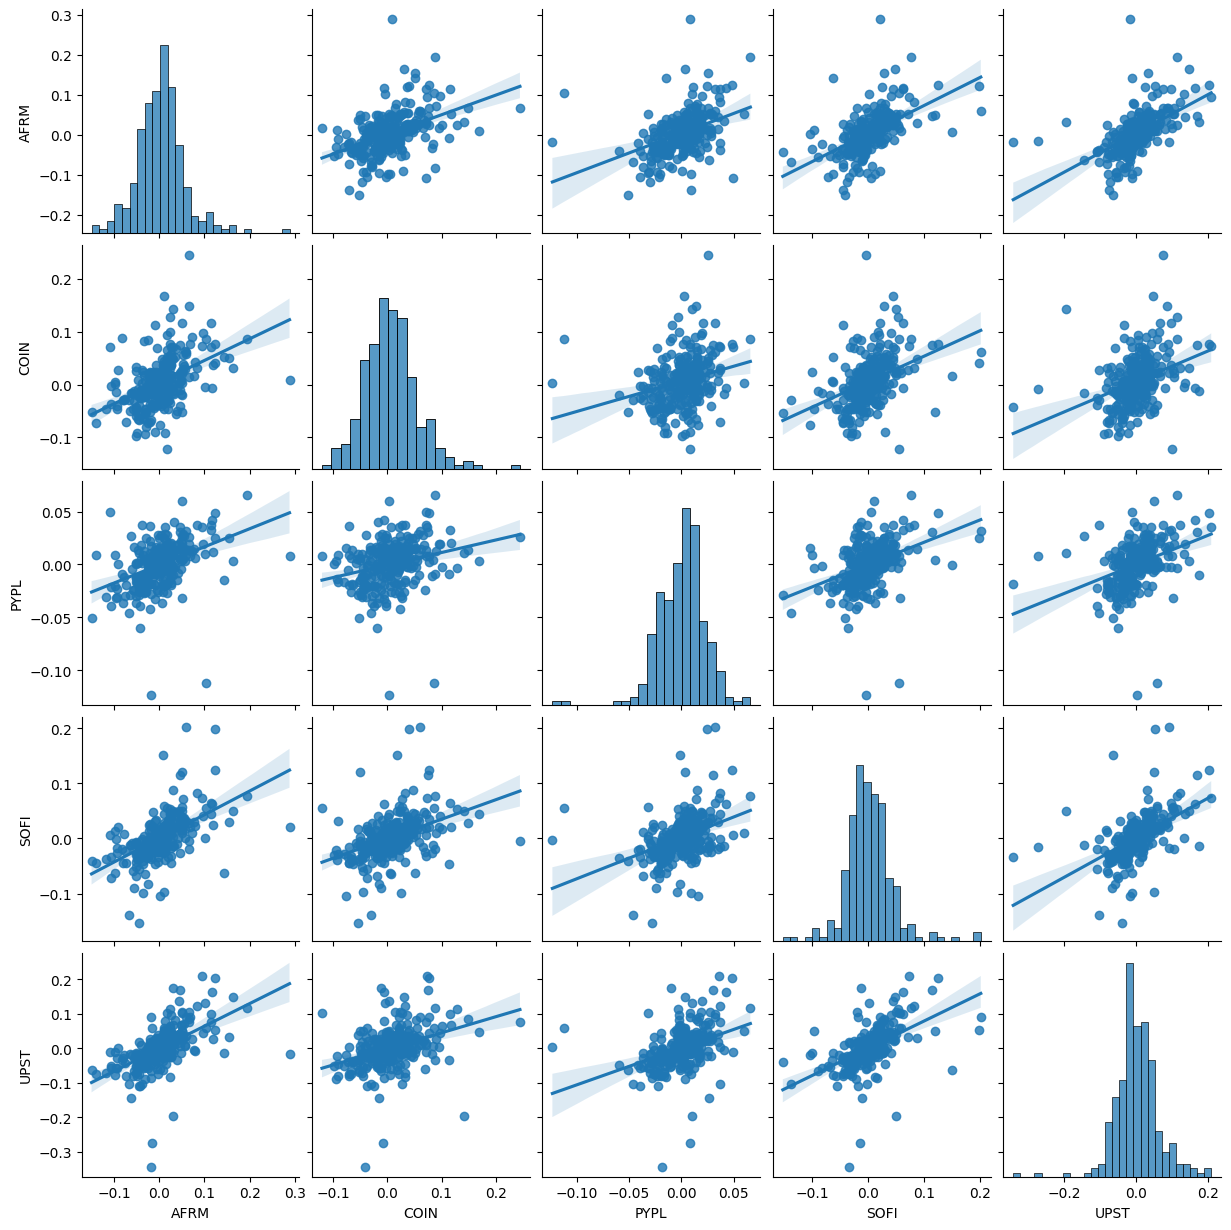

In [26]:
# Visualize correlation between different stocks' daily return
sns.pairplot(stock_return, kind='reg')

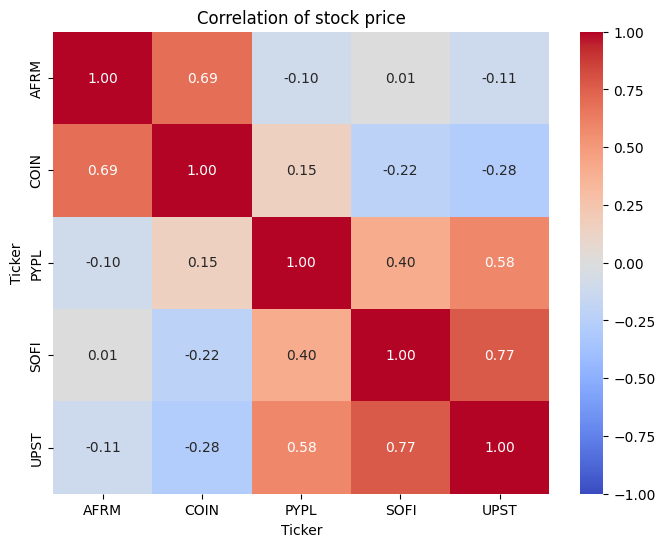

In [101]:
# Create heatmap for correlation between different stocks' closing price
plt.figure(figsize=(8, 6))
sns.heatmap(closing_df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of stock price');

**Correlation of Closing Prices:**

- The heatmap reveals a moderate positive correlation between AFFIRM and COIN (0.69), suggesting that their prices tend to move in the same direction.
- A weak negative correlation exists between AFFIRM and PYPL (-0.10), indicating a slight tendency for their prices to move in opposite directions.
- There's a moderate positive correlation between PYPL, SOFI, and UPST (0.40, 0.58, and 0.77 respectively), suggesting a potential connection in their market performance.
- The remaining correlations are relatively weak, suggesting that the closing prices of these stocks are not strongly interconnected.ed.

Text(0.5, 1.0, 'Correlation of stock daily return')

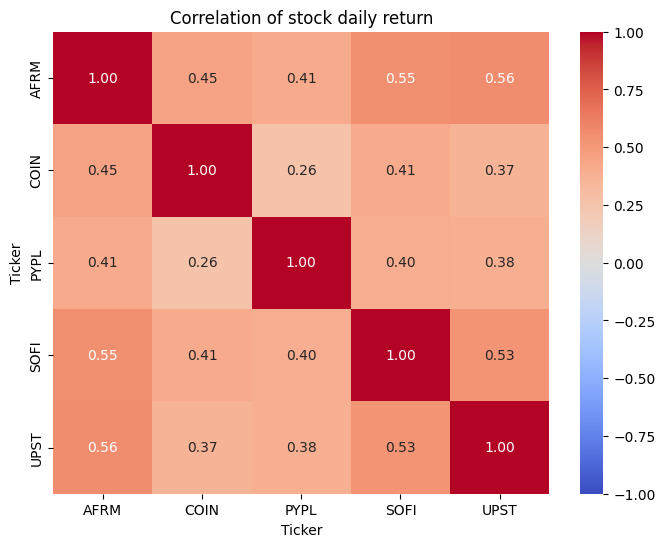

In [28]:
# Create heatmap for correlation between different stocks' daily return
plt.figure(figsize=(8, 6))
sns.heatmap(stock_return.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of stock daily return')

**Correlation of Daily Returns:**

- The heatmap highlights a moderate positive correlation between AFFIRM and COIN (0.45), suggesting that their daily price changes tend to move together.
- Moderate positive correlations also exist between COIN and SOFI (0.41), AFRM and UPST (0.56), and AFRM and SOFI (0.55), indicating that their daily returns often move in similar patterns.
- The remaining correlations are weaker, suggesting less pronounced relationships between the daily returns of these stocks.cks.

**Key Observations:**

- AFFIRM and COIN: These two stocks exhibit a strong correlations in both closing prices and daily returns, suggesting a potential connection in their market performance.
- PYPL, SOFI, and UPST: These three stocks show moderate positive correlations in closing prices, suggesting a potential influence on each other's price movements.
- Limited Correlation: The overall correlations between the stocks are relatively weak, indicating that their price movements are not strongly influenced by each other.

**=> Investment Implications:**

- Diversification: The limited correlations suggest that including these stocks in a portfolio can help diversify investment risk, as their price movements are not highly synchronized.
- Sector-Specific Factors: The moderate correlations between certain stocks might be driven by shared sector-specific factors, such as regulatory changes or industry trends.

## Risk analysis

,Stock,Expected Return,Standard Deviation
Ticker,,,
PYPL,SOFI,0.000224,0.022436
SOFI,UPST,0.001882,0.042275
COIN,COIN,0.006428,0.049348
AFRM,PYPL,0.004280,0.053883
UPST,AFRM,0.001557,0.062721


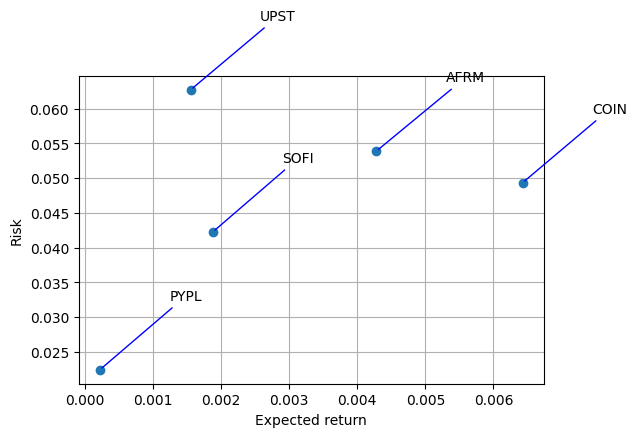

In [65]:
# Comparing the expected return with the standard deviation of the daily returns
returns = stock_return.dropna()

# Create a DataFrame for stocks expected daily return and standard deviation
stats = pd.DataFrame({
    'Stock': stock_list,
    'Expected Return': returns.mean(),
    'Standard Deviation': returns.std()})
stats_df = stats.sort_values(by='Standard Deviation')

# Plot the data
plt.figure(figsize=(6, 4))
plt.scatter(returns.mean(), returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.grid(True)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 arrowprops=dict(arrowstyle='-', color='blue'))
    
stats_df

**Risk-Return Trade-off:**

- **PYPL (PayPal):** PYPL emerges as the safest investment option. It has the lowest risk among the 5 stocks, with a standard deviation of 0.022436, and the lowest expected return of 0.000224.
- **COIN (Coinbase):** COIN is in the moderate risk-return category. It displays a slightly lower risk than AFFIRM, with a standard deviation of 0.049348, and the highest expected return of 0.006428.
- **SOFI (SoFi Technologies):** SOFI exhibits a moderate risk-return profile, similar to COIN. It has a standard deviation of 0.042275 and an expected return of 0.001882.
- **UPST (Upstart Holdings):** UPST is the riskiest stock, with a standard deviation of 0.062721, indicating a high level of volatility. Its expected return of 0.001557 is relatively low compared to its risk, making it a less attractive investment.
- **AFRM (Affirm Holdings):** AFFIRM strikes a balance between risk and return. It has a moderate risk level with a standard deviation of 0.053883 and a moderate expected return of 0.004280.

**=> Investment Implications:**

- **Risk-Averse Investors:** PYPL is the safest option in this group, with the lowest risk and a steady, if modest, expected return. It's a good choice for those who prioritize preserving capital over chasing high gains. PYPL's low volatility means the investment is less likely to experience wild swings, offering a sense of security. While its potential for growth might be limited, it provides a stable foundation for your portfolio.
- **Risk-Lover Investors:** COIN has a moderate risk level, but it also boasts the highest expected return among the five stocks. IIts higher volatility means investors could experience bigger losses, but also bigger wins.
- **Balanced Approach:** AFFIRM or SOFI offer a middle ground between risk and reward. They're not as risky as UPST or COIN, but they also have the potential for better returns than PYPL.These stocks provide a good balance between potential growth and risk management.management.

In [30]:
# Monte Carlo simulation to find the best portfolio
num_portfolios = 100000
all_weights = np.zeros((num_portfolios, len(stock_list)))
ret_arr = np.zeros(num_portfolios)
std_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(stock_list))
    weights /= np.sum(weights)
    all_weights[i,:] = weights
    ret_arr[i] = np.sum(returns.mean() * weights) * 252
    std_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_arr[i] = ret_arr[i] / std_arr[i]

# Identify the portfolio with the highest Sharpe ratio
best_sharpe_ratio_idx = sharpe_arr.argmax()
best_sharpe_ratio_return = ret_arr[best_sharpe_ratio_idx]
best_sharpe_ratio_risk = std_arr[best_sharpe_ratio_idx]
best_weights = all_weights[best_sharpe_ratio_idx,:]

# Identify the porfolio with the lowest standard deviation
lowest_std_idx = std_arr.argmin()
lowest_std_return = ret_arr[lowest_std_idx]
lowest_std_risk = std_arr[lowest_std_idx]
lowest_std_weights = all_weights[lowest_std_idx,:]

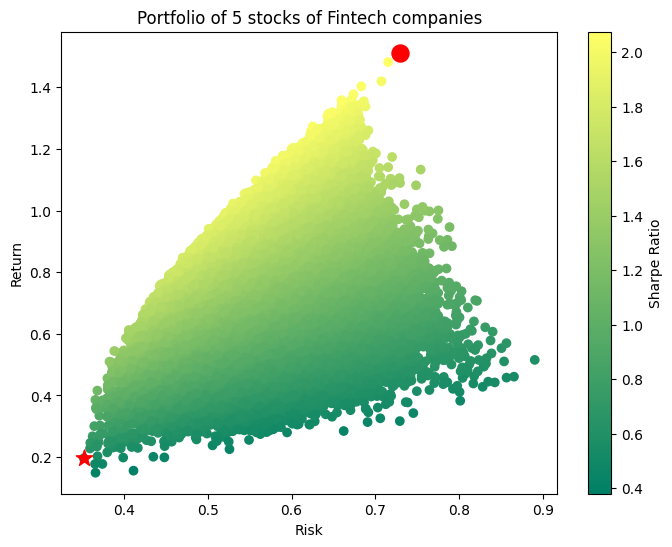

In [31]:
# Visualize the efficient frontier
plt.figure(figsize=(8,6))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, cmap='summer')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Portfolio of 5 stocks of Fintech companies')
plt.scatter(std_arr[best_sharpe_ratio_idx], ret_arr[best_sharpe_ratio_idx], c='red', s=150, label='Best Sharpe Ratio') # highlight best portfolio
plt.scatter(lowest_std_risk, lowest_std_return, marker='*', color='red', s=150, label='Lowest Standard Deviation') # highlight the lowest variance portfolio
plt.show()

In [61]:
# Print the best portfolio weights
best_portfolio = pd.DataFrame({'Stock': stock_list, 'Weight': best_weights})
print("Best Portfolio")
print("Expected Return:", best_sharpe_ratio_return)
print("Risk:", best_sharpe_ratio_risk)
best_portfolio

Best Portfolio
Expected Return: 1.5121992035112517
Risk: 0.7289205068311574


,Stock,Weight
0,PYPL,0.067953
1,COIN,0.872057
2,SOFI,0.004555
3,UPST,0.053147
4,AFRM,0.002288


In [62]:
# Print the lowest standard deviation portfolio weights
lowest_std = pd.DataFrame({'Stock': stock_list, 'Weight': lowest_std_weights})
print("Lowest standard deviation portfolio:")
print("Expected Return:", lowest_std_return)
print("Volatility:", lowest_std_risk)
lowest_std

Lowest standard deviation portfolio:
Expected Return: 0.19617534336743173
Volatility: 0.3520279687180201


,Stock,Weight
0,PYPL,0.025212
1,COIN,0.065745
2,SOFI,0.880133
3,UPST,0.016892
4,AFRM,0.012017


**Assume an investor invests in a portfolio consisting of these 5 stocks:**
- **Best portfolio (Highest Sharpe Ratio)**: The portfolio leans heavily on COIN, which is unsurprising given its relatively high expected return (0.006428) and moderate risk (0.049348). This suggests a strategy of maximizing potential gains while accepting a moderate level of risk. The inclusion of UPST, despite its high risk, might be due to its potential for outsized returns, albeit with a higher chance of volatility.
- **Lowest Standard Deviation Portfolio:** The portfolio prioritizes minimizing risk, as evidenced by its significantly lower standard deviation. It achieves this by heavily weighting SOFI, which has a moderate expected return (0.001882) and a relatively low risk (0.042275). The inclusion of a small portion of UPST, despite its high risk, might be due to its potential for diversification benefits, adding a small dose of potential upside.

=> **Investment Implications:**

- Risk Tolerance: The best portfolio, with its high Sharpe ratio, is suitable for investors with a moderate to high risk tolerance who seek significant returns. The lowest standard deviation portfolio, with its focus on risk minimization, is better suited for risk-averse investors who prioritize capital preservation.
- Diversification: Both portfolios demonstrate the importance of diversification. While each portfolio has a dominant stock, they also include other assets to balance risk and potentially enhance returns.
- Dynamic Approach: These portfolios showcase the dynamic nature of investment strategies. As market conditions change, the optimal portfolio composition might also need to be adjusted. Regular monitoring and rebalancing are crucial to maintain desired risk-return levels.els.

## Overall Evaluation

### **Strengths and weaknesses of each stock:**

| Ticker | Strengths | Weaknesses | Overall |
|-------|-------|-------|-------|
| **PYPL**   | Reliable and stable performance. Low risk. Moderate trading volume.   | Modest expected return, limited potential for significant growth.   | A safe and steady investment suitable for risk-averse investors who prioritize capital preservation.   |
| **COIN**   | Strong momentum with significant price gains and high trading volume. High expected return. Moderate risk.   | High volatility, leading to potential for both substantial gains and losses,   | Compelling choice for risk-tolerant investors seeking significant growth potential,  |
| **SOFI**   | Moderate risk-return profile, offering a balance between potential growth and stability. Moderate trading volume, suggesting a healthy level of interest.  | Mixed price changes, suggesting some volatility.  | Reasonable choice for investors seeking a balance between potential growth and stability, but performance might not be as explosive.  |
| **UPST**  | Shown some price gains, suggesting potential for growth.  | High risk profile. Low expected return, limiting potential for significant growth. High volatility, leading to potential for both substantial gains and losses.| Speculative investment suitable only for investors with a very high risk tolerance. |
| **AFRM**  | Solid performance with positive price changes. Moderate risk-return profile. Moderate trading volume.  | Not as explosive as some other stocks, potentially limiting upside.  | Balanced choice for investors seeking a blend of potential growth and stability.  | |  | 20  |

### **Overall**
- **The Growth Stocks:**

    - **COIN:** COIN consistently demonstrates strong momentum, with significant price gains and high trading volume. Its high expected return and moderate risk make it a compelling choice for investors with a higher risk tolerance. However, its volatility can be a double-edged sword, leading to both substantial gains and potential losses.
    - **AFFIRM:** AFFIRM also exhibits solid performance, with positive price changes and moderate trading volume. Its balanced risk-return profile makes it a solid option for investors seeking a blend of potential growth and stability.
 
- **The Stable Stocks:**
    - **PYPL:** PYPL remains a reliable and stable investment, with consistent performance and a low risk profile. While its expected return is modest, its low volatility makes it a good choice for risk-averse investors who prioritize capital preservation.
 
- **The Conservative Stocks:**
    - **SOFI:** SOFI shows potential but has experienced some volatility, with mixed price changes and moderate trading volume. Its moderate risk-return profile makes it a reasonable choice for investors seeking a balance, but its performance might not be as explosive as some of the other stocks.
    - **UPST:** UPST remains the riskiest stock in the group, with high volatility and a low expected return. While it has shown some price gains, its high risk profile makes it a speculative investment suitable only for investors with a very high risk tolerance...

### **Key Considerations**

- **Correlation:** The correlation between these stocks suggests that they are somewhat influenced by similar market factors. This means that their prices can move in tandem, potentially amplifying both gains and losses. Diversification is crucial to mitigate this risk.
- **Market Sentiment:** The fintech sector is currently experiencing a period of growth, but it's important to consider the broader market sentiment and economic conditions, which can significantly impact stock prices.es.

### **Investment Strategy:**

- **Risk Tolerance:** Investors should carefully consider their risk tolerance and investment goals before making any decisions. Risk-averse investors might favor PYPL, while risk-tolerant investors could consider COIN or AFFIRM.
- **Diversification:** A diversified portfolio that includes a mix of these stocks can help mitigate risk and potentially enhance returns.
- **Market Monitoring:** It's crucial to monitor market conditions and the performance of these stocks regularly. Adjusting the portfolio based on changing market dynamics can help optimize the investment strategy.

## Predict future particular stock price

In [70]:
# Predict future closing prices of stocks using an LSTM model
def predict_stock_price(stock_data, prediction_days):
    # Create a new dataframe with only the 'Close' column
    data = stock_data.filter(['Close'])
    dataset = data.values

    # Get the number of rows to train the model on (80% of the data)
    training_data_len = int(np.ceil(len(dataset) * 0.8))
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    # Create the training dataset
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    # Convert the data to a numpy array
    x_test = np.array(x_test)
    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    # Ensure predictions are above 0
    predictions[predictions < 0] = 0

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"Root Mean Squared Error: {rmse}")

    # Add the predicted prices to the original dataframe
    data['Predicted Close'] = np.nan
    data.iloc[training_data_len:, data.columns.get_loc('Predicted Close')] = predictions[:, 0]

    # Predict the next 60 days
    future_predictions = []
    last_60_days = scaled_data[-60:]
    future_data = [last_60_days]
    
    for i in range(prediction_days):  
        next_input = np.array(future_data[-1])
        next_input = np.reshape(next_input, (1, next_input.shape[0], 1))
        next_pred = model.predict(next_input, verbose=0)
        future_data.append(np.append(next_input[0][1:], next_pred, axis=0))
        future_predictions.append(scaler.inverse_transform(next_pred)[0][0])
    
    # Create a date range for the future predictions
    last_date = stock_data.index[-1]
    future_dates = pd.date_range(last_date, periods=prediction_days + 1, freq='B')[1:]
    # Create a DataFrame for the future predictions
    future_df = pd.DataFrame(future_predictions, columns=['Predicted Close'], index=future_dates)

    # Combine historical and future data
    all_data = pd.concat([data, future_df], sort=False)
    all_data['Predicted Daily Return'] = all_data['Predicted Close'].pct_change()

    # Create a DataFrame to store the monthly average predictions and returns
    future_df['Month'] = future_df.index.to_period('M')
    mean_predictions = future_df.groupby('Month').mean()
    mean_predictions['Average Predicted Daily Return'] = mean_predictions['Predicted Close'].pct_change()
    
    #Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')    
    # Plot historical and training data
    train = all_data[:training_data_len]
    valid = all_data[training_data_len:]
    plt.plot(train['Close'], label='Historical')
    plt.plot(valid['Close'], label='Validation', color='orange')
    plt.plot(valid['Predicted Close'], label='Predictions', color='red', linestyle='--')
    plt.plot(future_df['Predicted Close'], label='Future Predictions', linestyle='--')
    plt.axvline(x=stock_data.index[-1], color='gray', linestyle='--', linewidth=2, label='Prediction Start') # Vertical line to separate historical and predicted data    
    plt.legend()
    plt.show()
    
    print('Range of Predicted Close Price:', '[',future_df['Predicted Close'].min(), ',', future_df['Predicted Close'].max(), ']')
    print("Predicted Close Price")
    print(all_data)
    print("\nMean Predictions:")
    print(mean_predictions)

[*********************100%%**********************]  1 of 1 completed
C:\Users\Duyen\anaconda3\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0189
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
Root Mean Squared Error: 1.6062438194303514


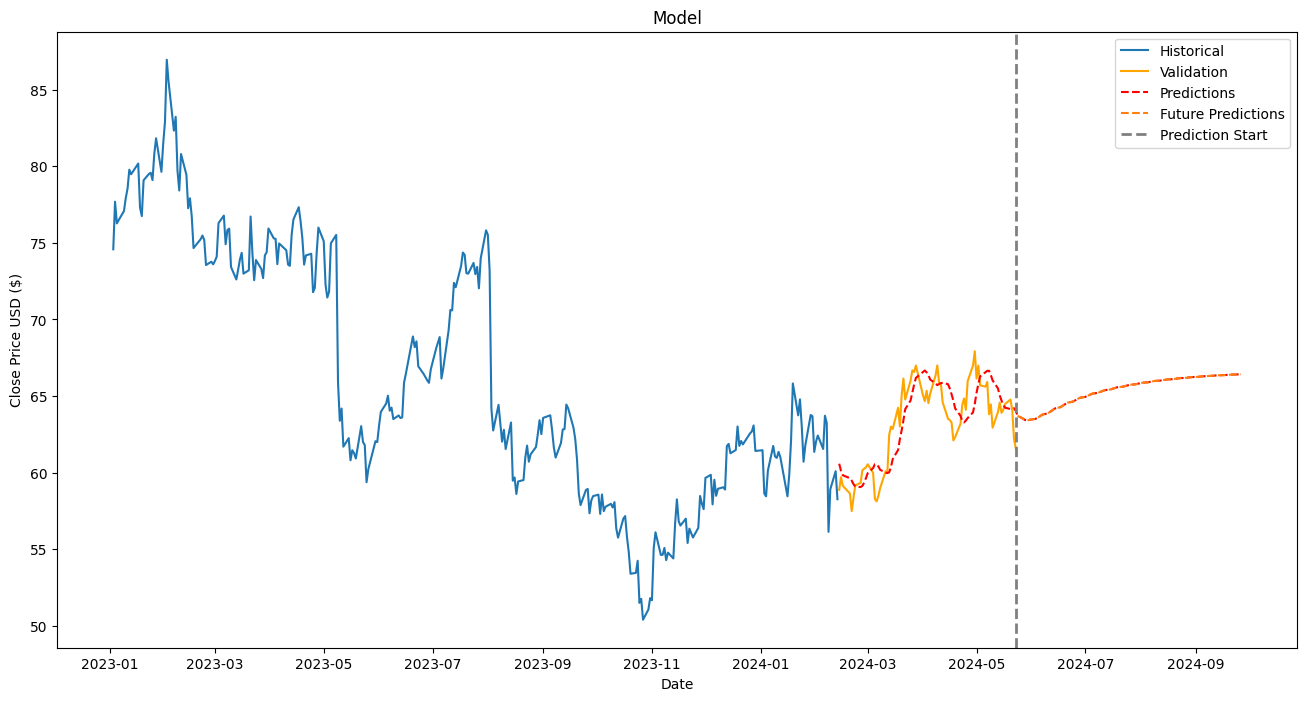

Range of Predicted Close Price: [ 63.41122055053711 , 66.42183685302734 ]
Predicted Close Price
                Close  Predicted Close  Predicted Daily Return
2023-01-03  74.580002              NaN                     NaN
2023-01-04  77.690002              NaN                     NaN
2023-01-05  76.269997              NaN                     NaN
2023-01-06  76.480003              NaN                     NaN
2023-01-09  77.080002              NaN                     NaN
...               ...              ...                     ...
2024-09-20        NaN        66.391716                0.000123
2024-09-23        NaN        66.399612                0.000119
2024-09-24        NaN        66.407265                0.000115
2024-09-25        NaN        66.414673                0.000112
2024-09-26        NaN        66.421837                0.000108

[440 rows x 3 columns]

Mean Predictions:
         Predicted Close  Average Predicted Daily Return
Month                                           

In [71]:
PYPL = pdr.get_data_yahoo('PYPL', start='2023-01-01', end=datetime.now())
predict_stock_price(PYPL, 90)

[*********************100%%**********************]  1 of 1 completed
C:\Users\Duyen\anaconda3\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0138
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
Root Mean Squared Error: 19.082560520891686


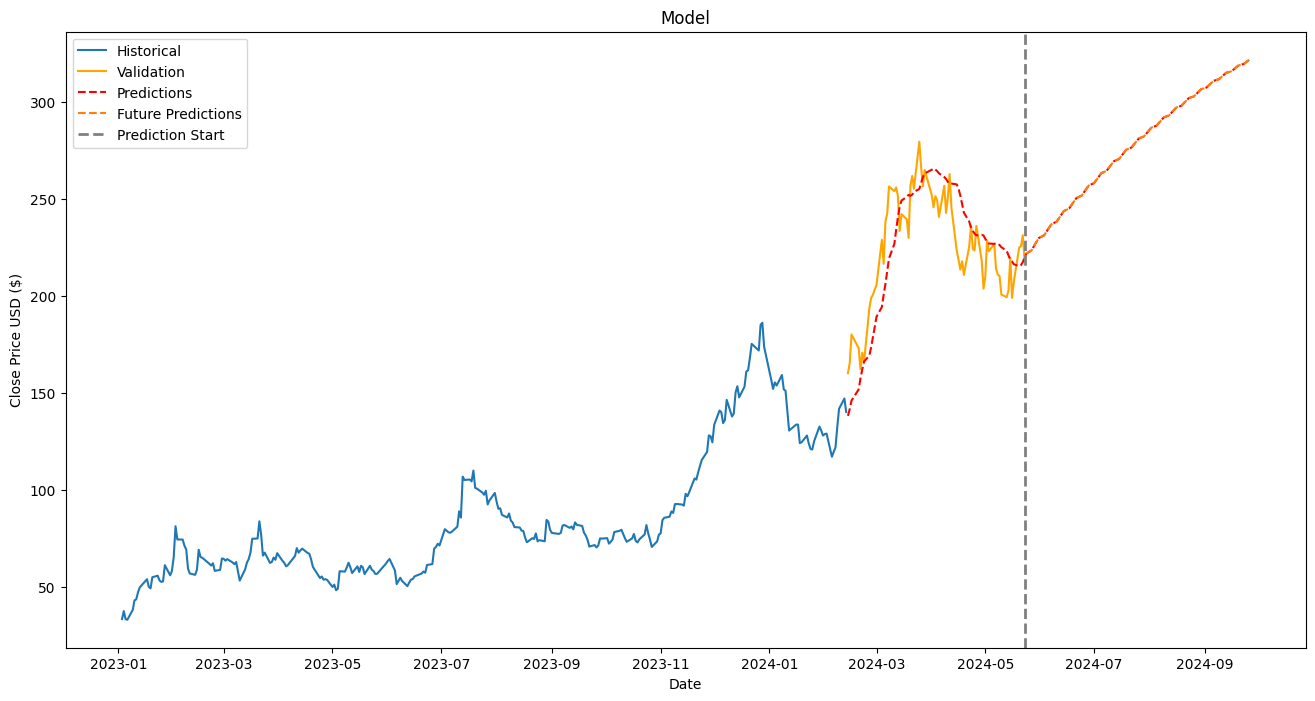

Range of Predicted Close Price: [ 221.97215270996094 , 321.9560852050781 ]
Predicted Close Price
                Close  Predicted Close  Predicted Daily Return
2023-01-03  33.599998              NaN                     NaN
2023-01-04  37.700001              NaN                     NaN
2023-01-05  33.529999              NaN                     NaN
2023-01-06  33.259998              NaN                     NaN
2023-01-09  38.270000              NaN                     NaN
...               ...              ...                     ...
2024-09-20        NaN       319.044495                0.002363
2024-09-23        NaN       319.786865                0.002327
2024-09-24        NaN       320.519592                0.002291
2024-09-25        NaN       321.242645                0.002256
2024-09-26        NaN       321.956085                0.002221

[440 rows x 3 columns]

Mean Predictions:
         Predicted Close  Average Predicted Daily Return
Month                                          

In [95]:
COIN = pdr.get_data_yahoo('COIN', start='2023-01-01', end=datetime.now())
predict_stock_price(COIN, 90)

[*********************100%%**********************]  1 of 1 completed
C:\Users\Duyen\anaconda3\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0257
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step
Root Mean Squared Error: 0.417109569876254


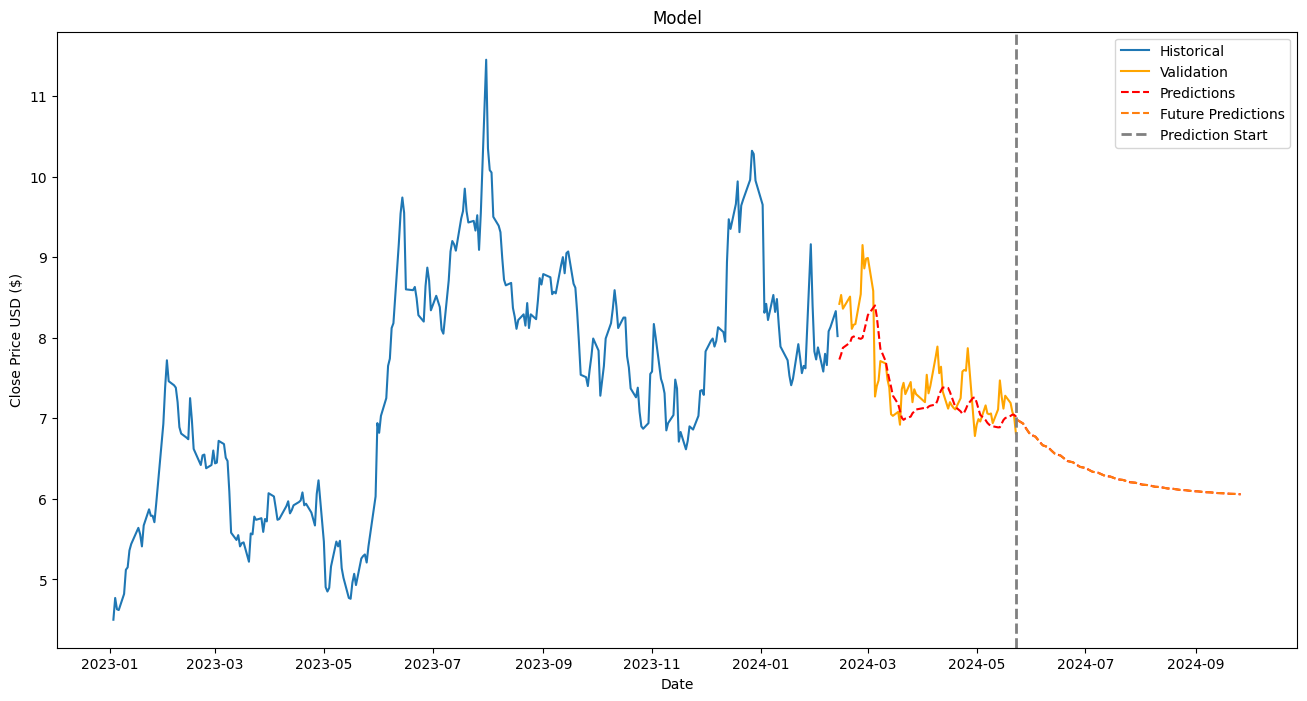

Range of Predicted Close Price: [ 6.056886196136475 , 6.975798606872559 ]
Predicted Close Price
            Close  Predicted Close  Predicted Daily Return
2023-01-03   4.50              NaN                     NaN
2023-01-04   4.77              NaN                     NaN
2023-01-05   4.63              NaN                     NaN
2023-01-06   4.62              NaN                     NaN
2023-01-09   4.82              NaN                     NaN
...           ...              ...                     ...
2024-09-20    NaN         6.063118               -0.000280
2024-09-23    NaN         6.061479               -0.000270
2024-09-24    NaN         6.059896               -0.000261
2024-09-25    NaN         6.058365               -0.000253
2024-09-26    NaN         6.056886               -0.000244

[440 rows x 3 columns]

Mean Predictions:
         Predicted Close  Average Predicted Daily Return
Month                                                   
2024-05         6.884143               

In [40]:
SOFI = pdr.get_data_yahoo('SOFI', start='2023-01-01', end=datetime.now())
predict_stock_price(SOFI, 90)

[*********************100%%**********************]  1 of 1 completed
C:\Users\Duyen\anaconda3\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0352
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
Root Mean Squared Error: 2.2365376515062656


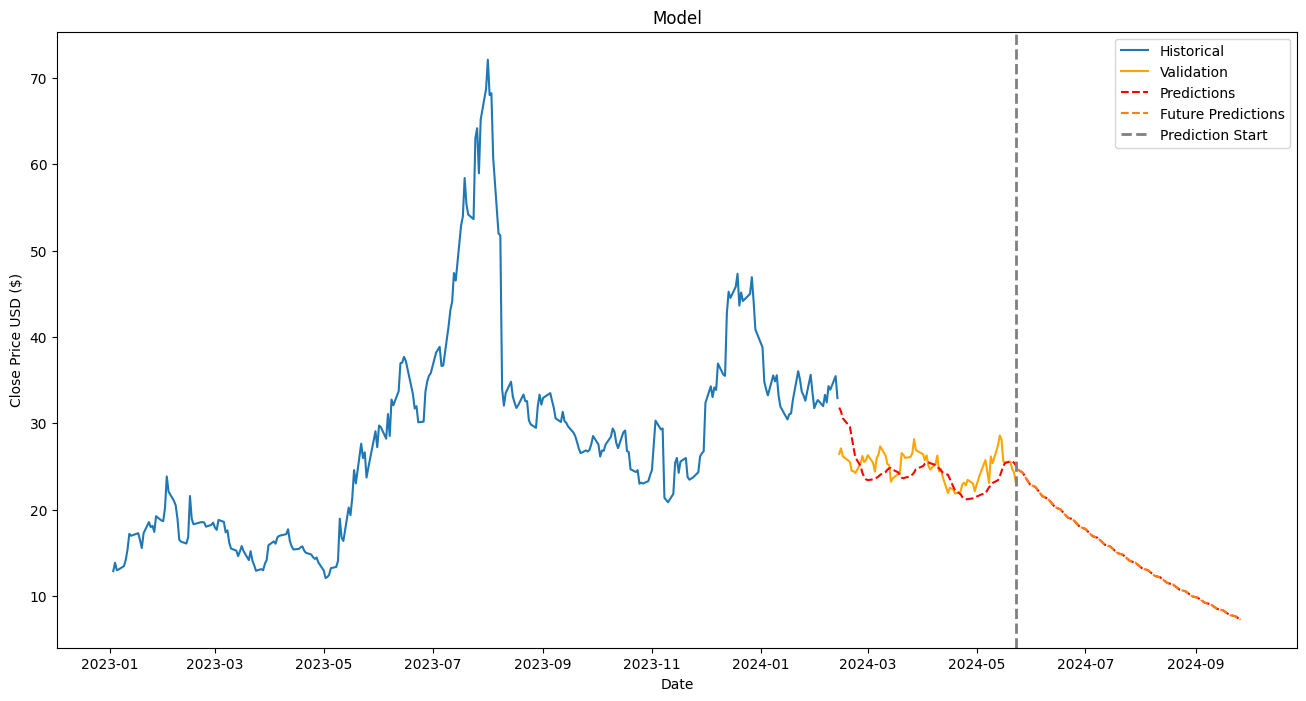

Range of Predicted Close Price: [ 7.2716965675354 , 24.680570602416992 ]
Predicted Close Price
            Close  Predicted Close  Predicted Daily Return
2023-01-03  12.89              NaN                     NaN
2023-01-04  13.87              NaN                     NaN
2023-01-05  13.00              NaN                     NaN
2023-01-06  13.09              NaN                     NaN
2023-01-09  13.48              NaN                     NaN
...           ...              ...                     ...
2024-09-20    NaN         7.815423               -0.017330
2024-09-23    NaN         7.678363               -0.017537
2024-09-24    NaN         7.542064               -0.017751
2024-09-25    NaN         7.406511               -0.017973
2024-09-26    NaN         7.271697               -0.018202

[440 rows x 3 columns]

Mean Predictions:
         Predicted Close  Average Predicted Daily Return
Month                                                   
2024-05        23.758692                

In [97]:
UPST = pdr.get_data_yahoo('UPST', start='2023-01-01', end=datetime.now())
predict_stock_price(UPST, 90)

[*********************100%%**********************]  1 of 1 completed
C:\Users\Duyen\anaconda3\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0153
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
Root Mean Squared Error: 2.720368457927059


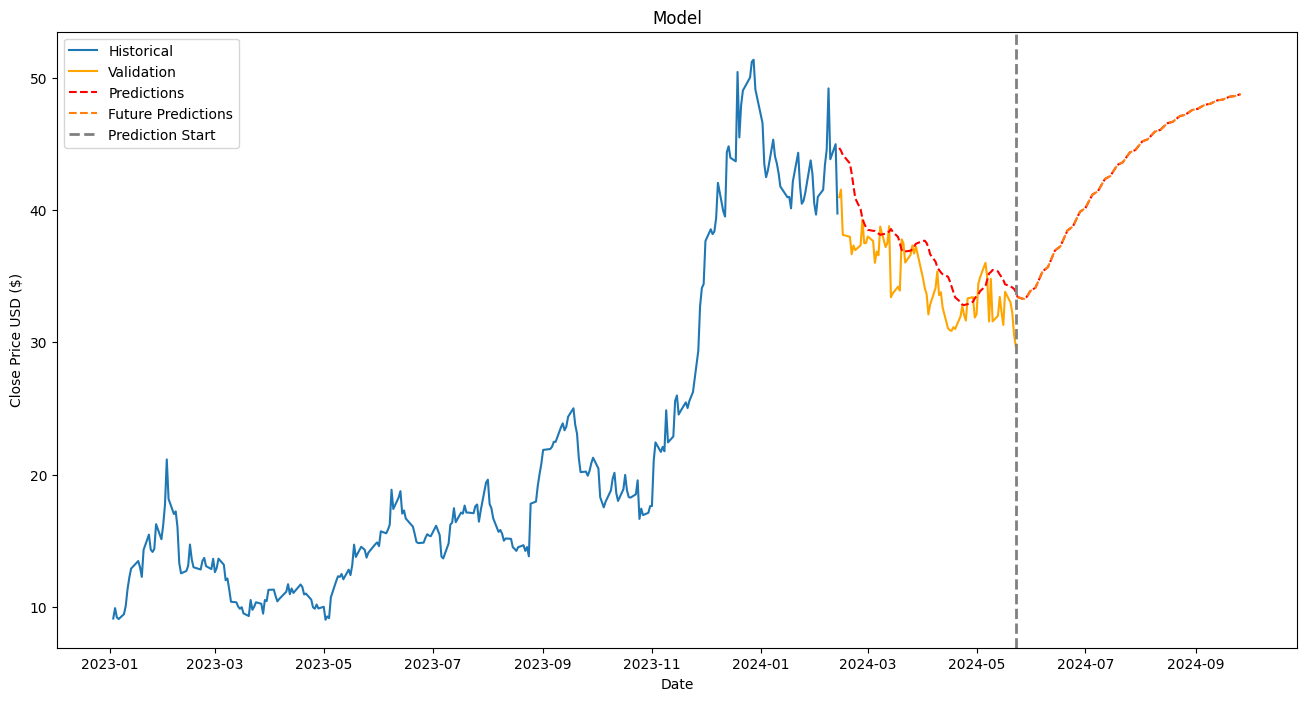

Range of Predicted Close Price: [ 33.29339599609375 , 48.784278869628906 ]
Predicted Close Price
            Close  Predicted Close  Predicted Daily Return
2023-01-03   9.10              NaN                     NaN
2023-01-04   9.89              NaN                     NaN
2023-01-05   9.19              NaN                     NaN
2023-01-06   9.06              NaN                     NaN
2023-01-09   9.43              NaN                     NaN
...           ...              ...                     ...
2024-09-20    NaN        48.593937                0.001071
2024-09-23    NaN        48.644115                0.001033
2024-09-24    NaN        48.692524                0.000995
2024-09-25    NaN        48.739227                0.000959
2024-09-26    NaN        48.784279                0.000924

[440 rows x 3 columns]

Mean Predictions:
         Predicted Close  Average Predicted Daily Return
Month                                                   
2024-05        33.491501              

In [98]:
AFRM = pdr.get_data_yahoo('AFRM', start='2023-01-01', end=datetime.now())
predict_stock_price(AFRM, 90)

### **Predicted price evaluation**

- **PYPL (PayPal):**

    - The Prudent Optimist: The model predicts a slight upward trend for PYPL over the next 90 days, suggesting a potential for slow but steady growth.
    - Steady-state stability: The model suggests minimal volatility, which is good news for those who prefer a smoother scheme. Without extreme volatility, stock performance manifests itself in the form of gentle price increases, providing a sense of stability and predictability.

- **COIN (Coinbase):**

    - The Bullish Speculation: COIN demonstrates a robust upward trend, accompanied by the potential for substantial returns. The stock aims to push beyond conventional boundaries and reach the top of the market.
    - Beware of Turbulence: The model also forecasts heightened volatility, implying that this particular stock may experience both exhilarating gains and potentially unexpected declines.
      
- **SOFI (SoFi Technologies):**

    - The Prudent Bear: SOFI embarks on the opposite direction, exhibiting a slight downward trend.
    - Moderate Turbulence: The model predicts moderate volatility, which means this stock could experience some ups and downs, but the overall direction is downward.
      
- **UPST (Upstart Holdings):**

    - The Gradual Descent: UPST also experiences a descending trend, featuring a moderate volatility that suggests a potential for moderate losses. 
    - Moderate Volatility: The model predicts moderate volatility, indicating that UPST may encounter intermittent fluctuations while adhering to an overall downward trajectory.
 
- **AFRM (Affirm Holdings):**

  - The Fast Growth: AFRM demonstrates a strong upward trend, accompanied by the potential for substantial returns. The stock exhibits a remarkable ascent, projecting a sense promising prospects.
  - An Uneven Return: The model also forecasts moderate volatility, suggesting intermittent fluctuations within the stock's direction. However, the overall direction remains positive.s.- r.

**⚠️Important Reminders:**

- The Limitations: These predictions are based on historical data and a specific LSTM model. The future is always uncertain, and these predictions are just a glimpse into what might happen.
- Market Turmoil: Market conditions can change rapidly, and unforeseen events can impact stock prices. It's like a game of chess, with unexpected moves and shifting strategies.
- Risk and Reward: Investing in the stock market always carries inherent risks. Consider the risk tolerance and investment goals carefully.